<h1><center> 4 NLP</center></h1>

<h1><center> BERT (Bidirectional Encoder Representations from Transformers)</center></h1>

Before moving on to the BERT (Bidirectional Encoder Representations from Transformers) architecture, we need to briefly touch on the attention and the transformers architecture on which the BERT architecture is built.

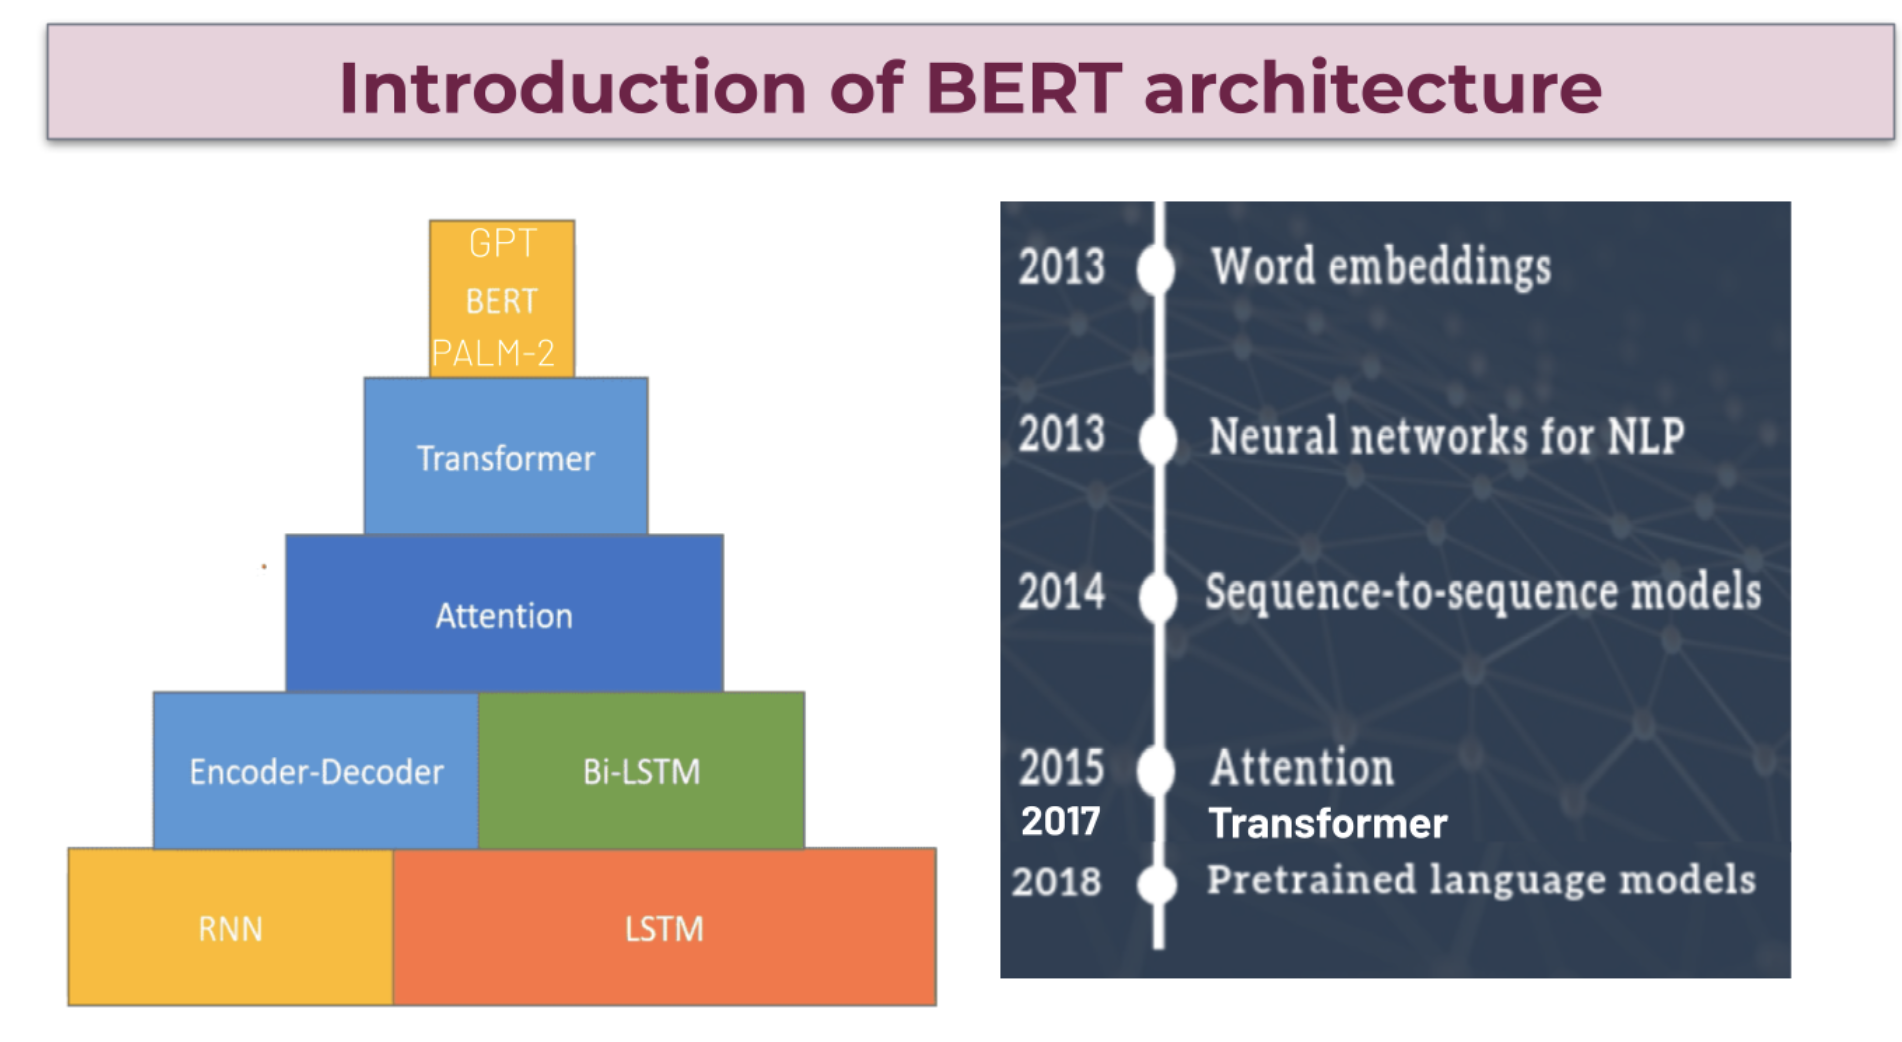

In recent years, there have been dizzying developments in the rapidly developing world of NLP. Transformers introduced by Google in 2017, revolutionized NLP. After its success in NLP tasks, it is now frequently preferred over RNN models such as LSTM and GRU. So what exactly are these transformers?

(ps: GPT is far better than BERT for the tasks of summarization, trasnlation etc; but BERT is as good as GPT for classification tasks)

## Transformer and Attention

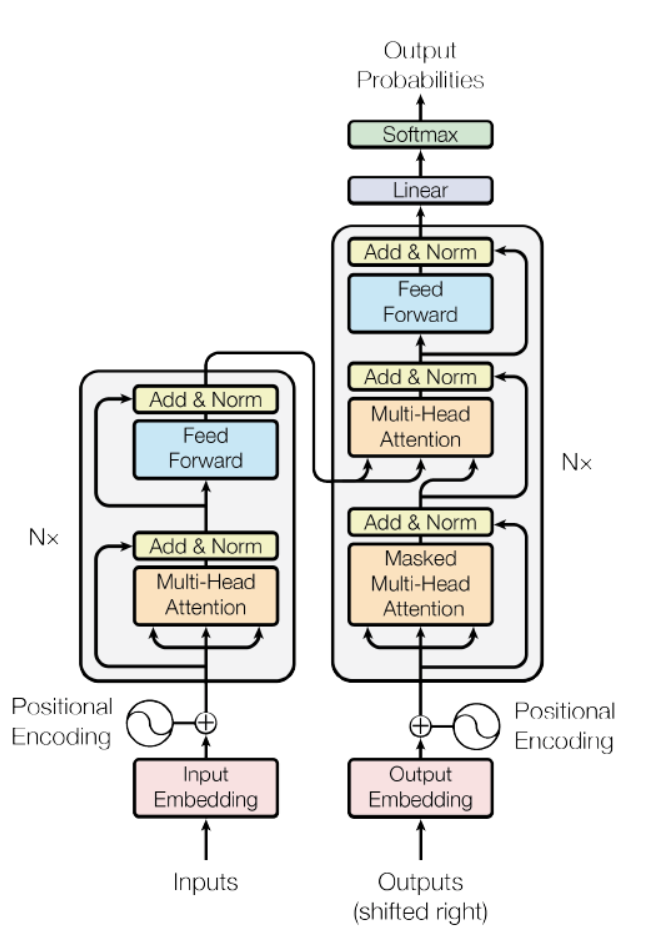

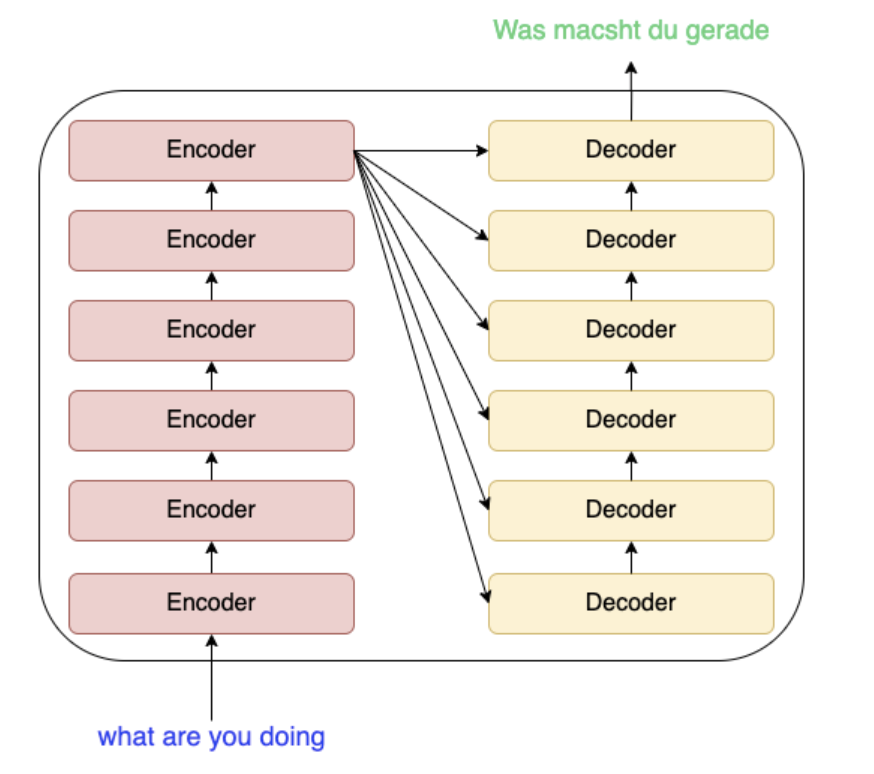

The above images show the structure of a transformer. **The transformer is built on encoder-decoder and attention mechanisms and consists of N encoder-decoders working in parallel with each other**. There are 6 encoder and 6 decoders layer which are parallel to each other. (Her bir encoder-decoder layer icinde 20den fazla LSTM-GRU calisiyor; bu nedenle cok daha guclu). The encoder first converts the input sentence to word embeddings and processes it to be predicted by the decoder and sends it to the decoder side. The data sent by the encoder is predicted by the decoder according to the type of problem. In order to understand the logic of BERT models, let's briefly touch on the working logic of transformers without going into too deep details.

**Transformers work in parallel with each other to eliminate both the model's running speed and the model's forgetting problems, instead of working in a serial way like LSTM and GRU models**. So what is this serial and parallel working logic? For example, the "How are you?" sentence is given to LSTM or GRU model in series as 1 "How", 2 "are", 3 "you" and 4 "?". However, in LSTM and GRU models that work in series, no action is taken on other words before the operation on the previous word is completed, and all words have to wait for their turn. This naturally extends the working time of the model.
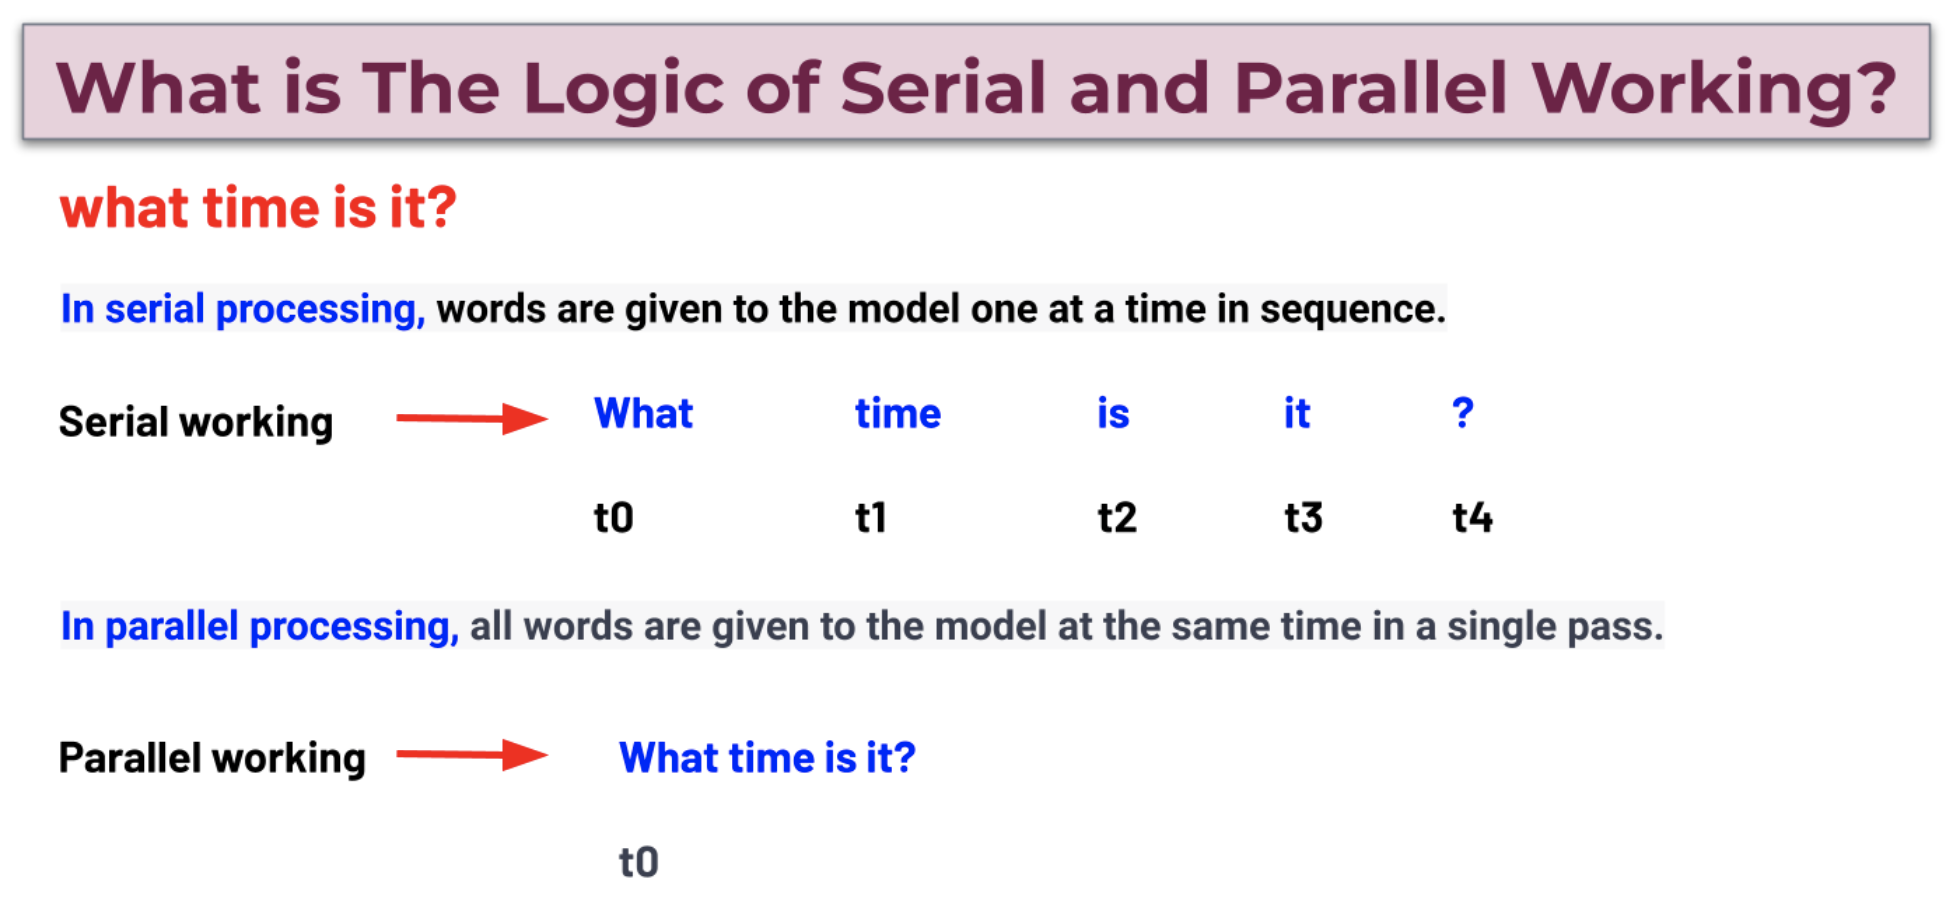

Serial working: her bir tokeni ayri bir time stepinde sirali olarak aliyor; paralelde ise tum texti tek seferde aliyor. Bu unutmayi engelliyor ve modelin calisma hizini artiriyor.

However, **in transformers "How are you?" sentence is given to the model as it is, not sequentially, and all words are processed at the same time, which reduces the working time**. However, in the transformer, the order of the words is not known by the model, since the entire sentence is given to the model at once. Since the order of the words is very important for NLP models to make sense of a sentence, the sequence information of all words in the sentence given as input to the transformer encoder is transferred to the model by the positional encoding layer.

**Attention**:

One of the most important mechanisms in transformations is undoubtedly attention mechanisms. **The attention mechanism (called self-attention)is the mechanism that decides which tokens to focus on by detecting all the contextual relationships among all tokens on which the model is trained, by means of the query, key, and values vectors created by the model**. Query, key ve valuelari egitim asamasinda atiyor hep. To give an example;

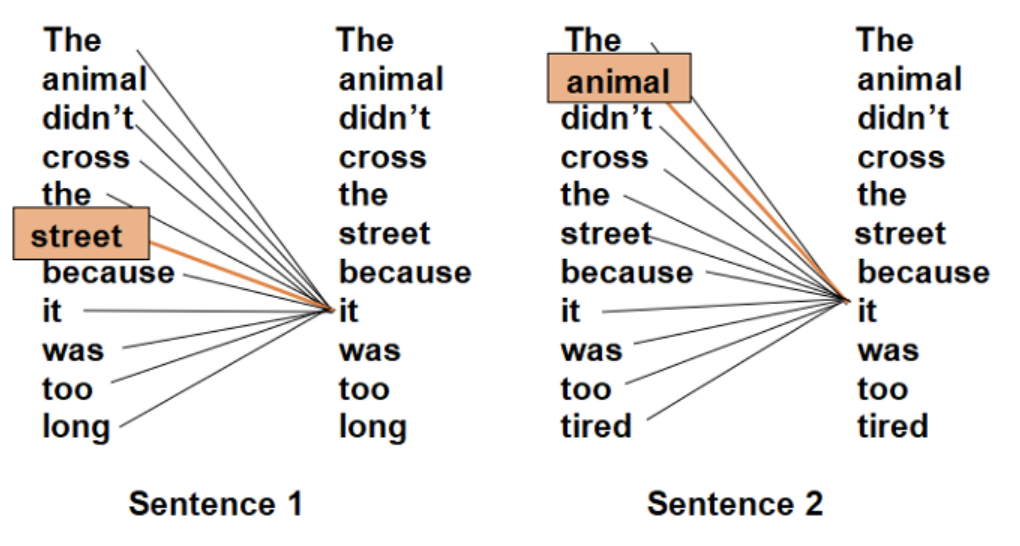

When we examine the 2 sentences above, the model needs the attention mechanism in order for the model to understand what is described by the word "it" in both sentences. So, "it" is query here. All other words are keys, and the mdoel checks for the value; the word with most significant semantic relationship. The Attention mechanism first detects and then weights the semantic connections among all the words on which the model is trained. All sentences in the corpus in which the model is trained are examined by the attention mechanism and it is determined which words are frequently used with which words. After this determination, the attention mechanism looks at the sentences above and says: "I have never seen a street was tired or a dog was too tall in any of the sentences I was trained in". Then the "it" in the first sentence is the street. The "it" in the second sentence is animal. (Value will be street in the 1st sentence and animal in the 2nd sentence).

**Attention mechanism works on query, key, and value vectors**. **Query** refers to any word, **key** refers to the words that are most contextually related to this word(query), and **value** refers to the most related word selected by the model among the related words.

The Multi-Head attention mechanism tries to better capture the semantic bonds between words by doing this process many times in different ways. The **train cost will be reduced as the model concentrates on weighted important words instead of all words**. Self-attention tek yonlu calisirken; multi-head self-attentionu cok yonlu ve cok sayida calistirir ve tokenlerin birbiriyle iliskisini cok daha iyi cikarir. 

## Working Logic of Transformer

**How do Transformers overcome the forgetting problem?**

A: Although LSTM and GRU models eliminate forgetting problems compared to classic RNN models, unfortunately, LSTM and GRU  are also insufficient in very long sentences. In order to prevent this forgetting, the transformer models' attention mechanism sends not only the last hidden layer as in LSTM and GRU models but all hidden layers to the decoder. In this way, the importance of the first word in the sentence is preserved, as in the last words, and information integrity is ensured.

In the light of this information coming from the encoder, the decoder works with a logic similar to the working logic of the encoder and predicts according to the type of problem. It uses the masked multi-head attention mechanism when making decoder predictions. In this mechanism, the "I am fine" answer, which the model should give to the "How are you?", is not given to the model as a whole, as is the case with the encoder. In order to make better model predictions, the words of the sentence are tried to be predicted one by one. the word "I" in the first iteration, the words "I am" in the 2nd iteration, and the words "I am fine" in the 3rd iteration are tried to be predicted. The Masked multi-head attention hides from the model by masking the words that need to be predicted sequentially and forces the model to make the correct prediction. This process allows the predictions to come true at higher rates.

## BERT

Now that we know the general structure and working logic of transformers, we can move on to BERT models. BERT was introduced by Google in 2018.

The BERT architecture builds on top of the Transformer. We currently have two variants available:

      BERT Base: 12 layers (transformer blocks), 12 attention heads, and 110 million parameters,

      BERT Large: 24 layers (transformer blocks), 16 attention heads, and 340 million parameters.

BERT was trained in 4 days on very powerful machines on the BookCorpus, which has 800 million vocabularies, and Wikipedia, which has 2.5 billion vocabularies. (gpt 3 3 ay da; gpt 4 ise 11 ayda egitilmisti; milyarlarca parametreyle; bundan dolayi bert'ten cok daha efektif).

BERT is trained with two techniques called **Masked Language Modeling (MLM) and Next Sentence Prediction (NSP)**, apart from being bidirectional.

In the first technique, when a sentence enters the model, the MLM technique is used in 15% of the words in the sentence. 80% of the words in which this technique is used are replaced with the [MASK] token, 10% are replaced with another random word, and the remaining 10% are left unchanged. If you ask how the 15% value is chosen, it is stated that masking too many words makes education very difficult, and masking too few words causes the content of the sentence to not be understood very well.

In the first technique, the model is trained based on the relationships between the words, while in the second technique, it is tried to guess whether the second sentence is a continuation of the first sentence with the sentence pairs given to the model. While 50% of the 2nd sentences in all sentence pairs are replaced with other sentences, 50% remain as they are. With these two Techniques, the model understands the semantic relationships between words and sentences much better, and naturally, our results improve significantly.

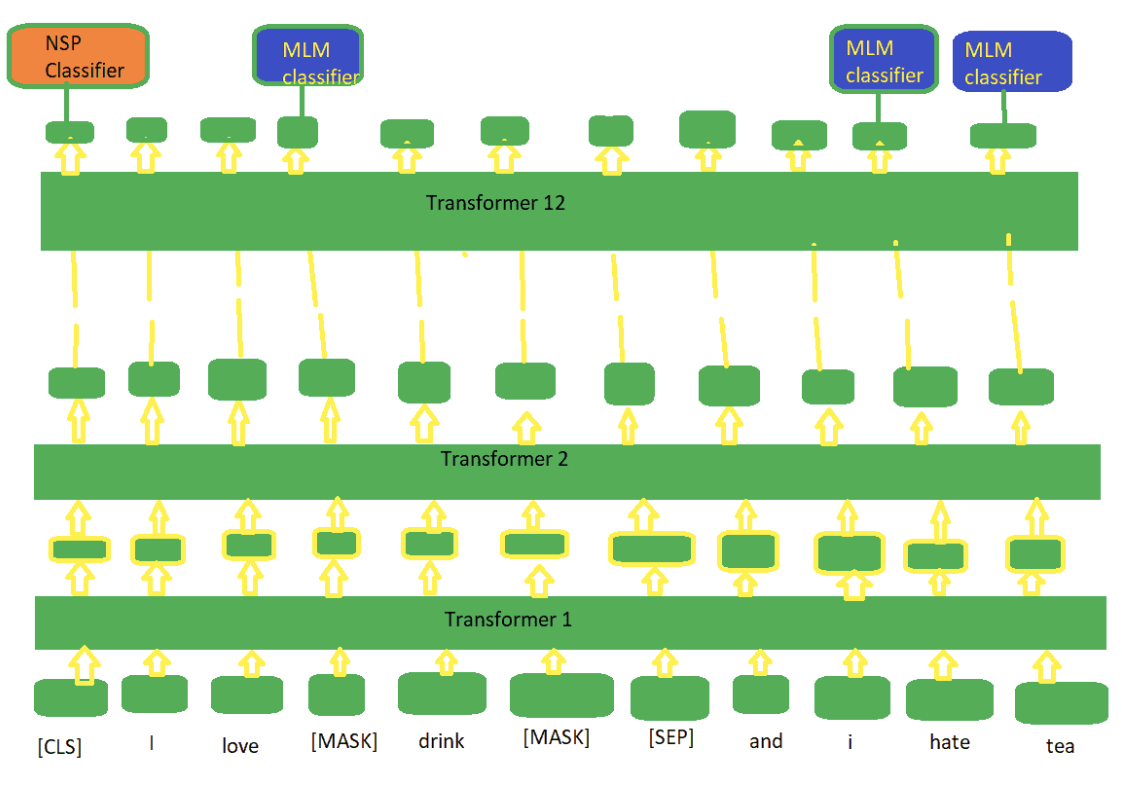

BERT models are shared from many open sources, especially **Hugging-Face**. Recently, it has been very popular to train the model by fine-tuning over BERT models.

**BERT use bidirectional transformer (both left-to-right and right-to-left direction) rather than unidirectional transformer (left-to-right direction)**.

The fact that BERT gives such successful results is due to the bidirectional transformer.  **BERT can be used for Machine Translation, Question Answering, text, and token classification**. Ama yeni cikan modeller cok daha iyi skor verdigi icin classification disinda artik BERT kullanilmiyor.

## Preparing the Data for The BERT Model

In BERT models, the maximum length of sentences is 512 tokens and each token is represented as a 768-dimensional vector (BERT-Base), 1024-dimensional vector (BERT-Large). All inputs given to BERT models must be of fixed length, as with RNNs. All sentences are fixed to the user-specified length by padding and truncation in the tokenization phase.

**The tokenization in BERT is done using a method called WordPiece tokenization**.

The WordPiece tokenization process applied in BERT models is different from the classic tokenization processes we know. In this method, tokens are tokenized separately according to their origin and attachment. For example, strawberry is expressed as two different tokens (straw and ##berry) as root and suffixes. let's look at another example. Here, embeddings is expressed as em, ##bed, ##ding and ##s. In this way, words/tokens that are not in the model's vocabulary (size of BERT vocabulary:30.522)  are also represented by a vector.

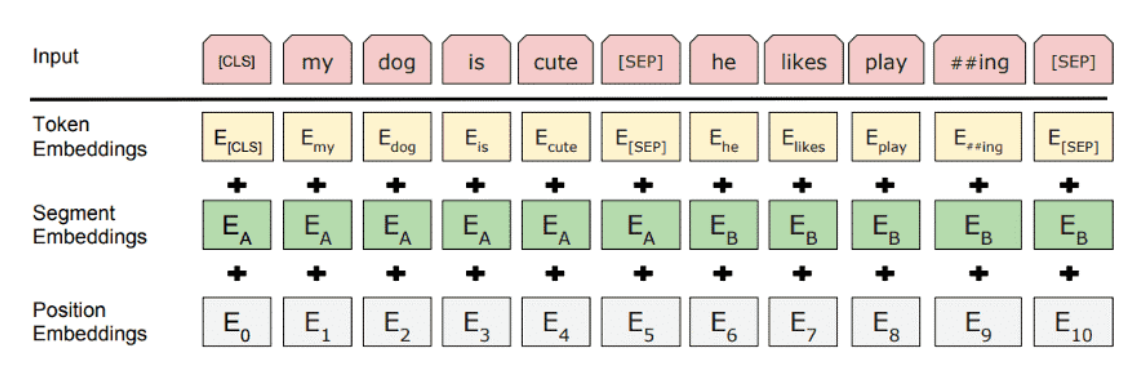

**In BERT models; The input must be given to the model with a tensor consisting of token, segment, and position embeddings vectors**. Otherwise, the model will not work. We can express the **tensor as a set of vectors and matrices**. Now let's look at these vectors briefly.

**Token Embeddings (input_ids)**:

Our input sentence must go through the tokenization process before it reaches the token embedding layer. In the tokenization process, all inputs are fixed to the same length, and the CLS token, which indicates the beginning of a sentence, and the SEP token, which indicates the end of the sentence, is added to the beginning and end of the sentence. In this way, the model can detect the beginning and end of the sentence.

After the tokenization process is completed, all tokens coming to the token embedding layer are converted into 768-dimensional vectors in the 30,522 token reservoirs of the BERT model.

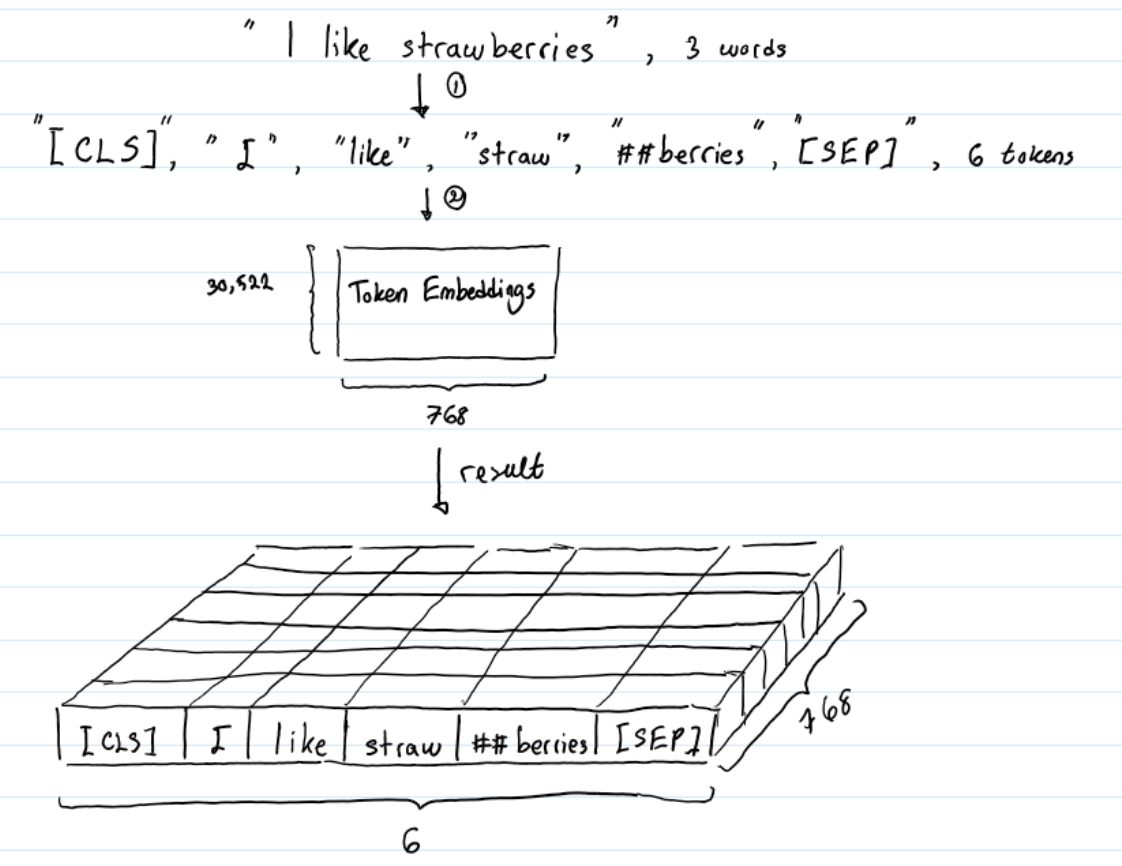

**Segment Embeddings (token_type_ids)**:

For Detecting the semantic similarities of two different sentences or tokens, translating a sentence or predicting the next sentence, etc. segment embedding layer is used.  It is not used for text and token classification.

These two separate sentences or tokens are given to the model in a combined form. The first sentence/token is represented by 0's and the second sentence/token by 1's.

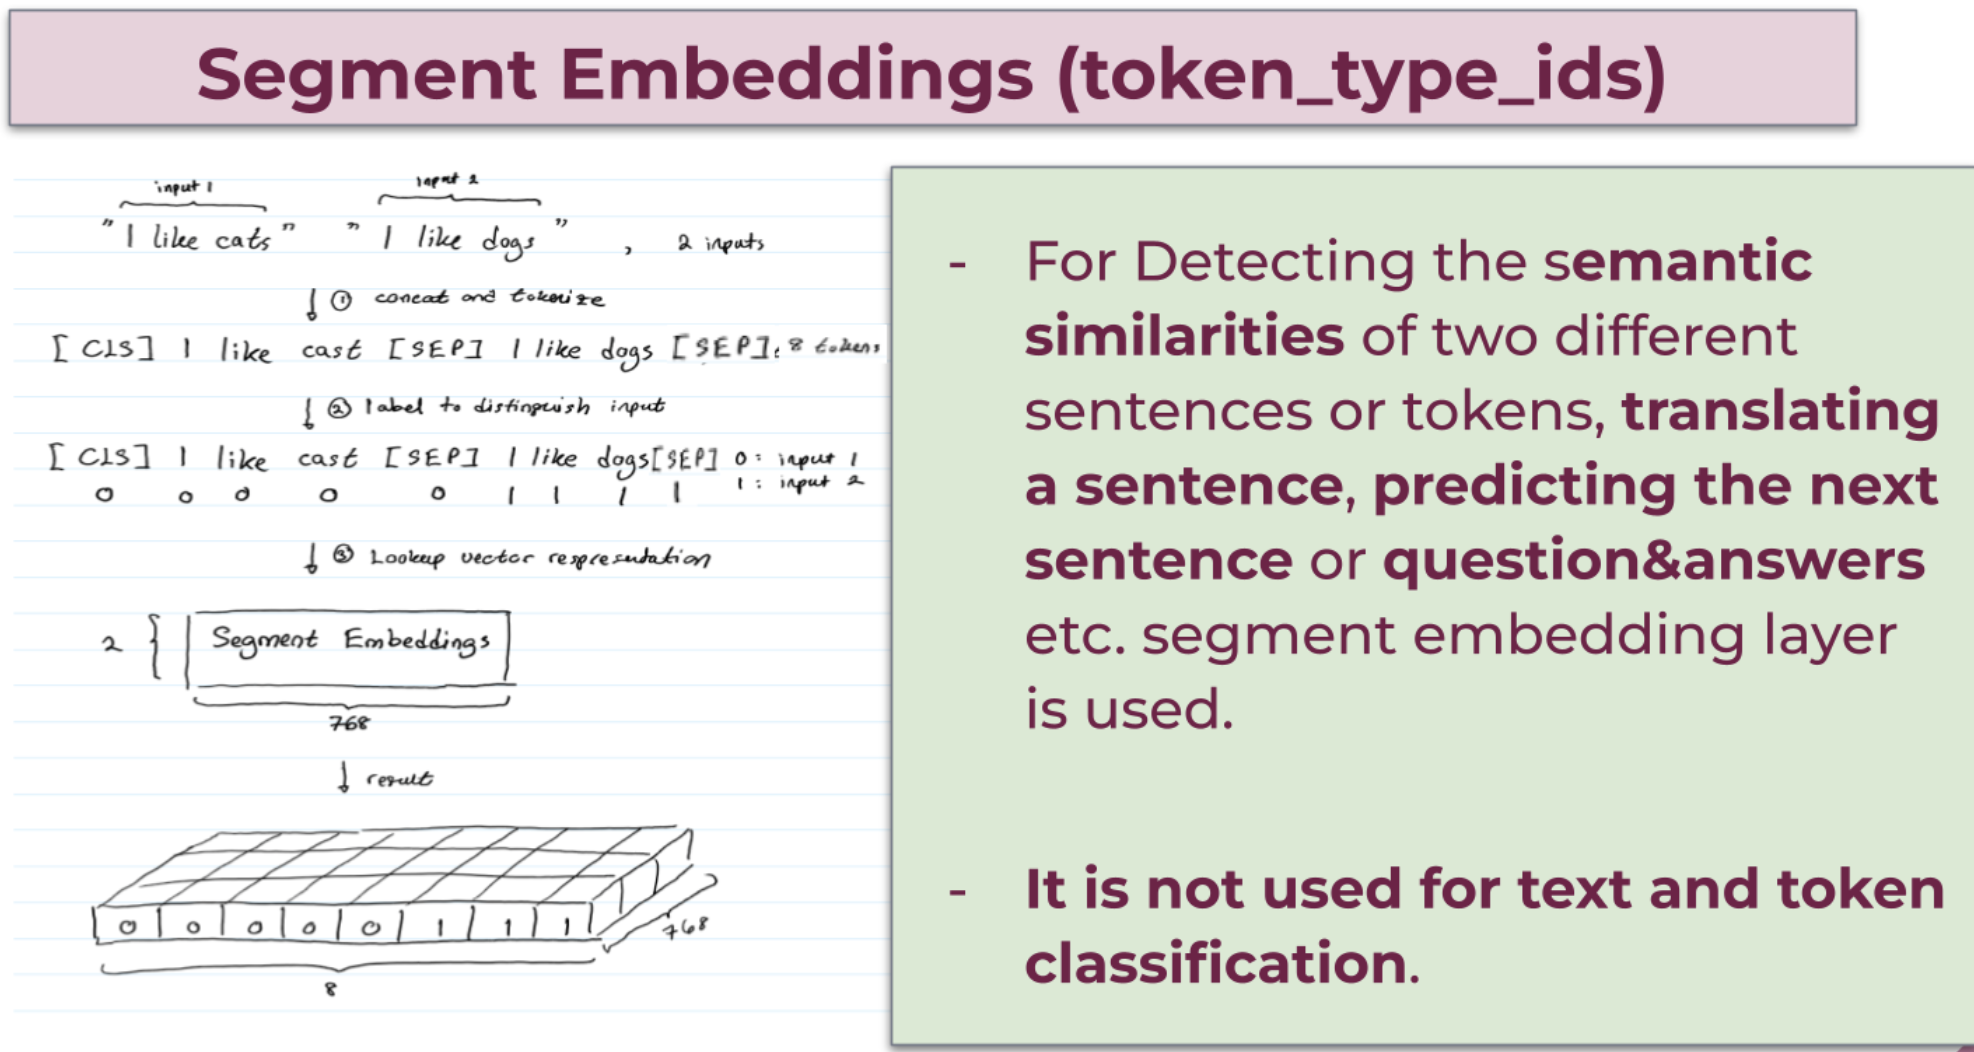

**Position Embeddings (attention_mask)**:

We have stated that **all input sentences given to BERT models must be of the same size. This length needs to be specified when building the model**. For example, let's say the fixed length for the whole model is 100 and our first sentence is "CLS I like cats SEP". **Position embedding layer; It will assign 1 to the "CLS", "I", "like", "cats" and "SEP" tokens while filling the remaining 95 tokens with PAD tokens, ie 0s**. **In this way, position embeddings are used to indicate the position of each token in the text**. This information helps the model to better understand the meaning of the text and make more accurate predictions. For example, in the sentence "I want to tell you something", knowing the distance between the token "you" and the token "I" allows the model to better understand the meaning of the sentence.

**The order information of tokens in the text is encoded into the word embeddings that represent the 1s**. In this way, the order of tokens is determined by the model.

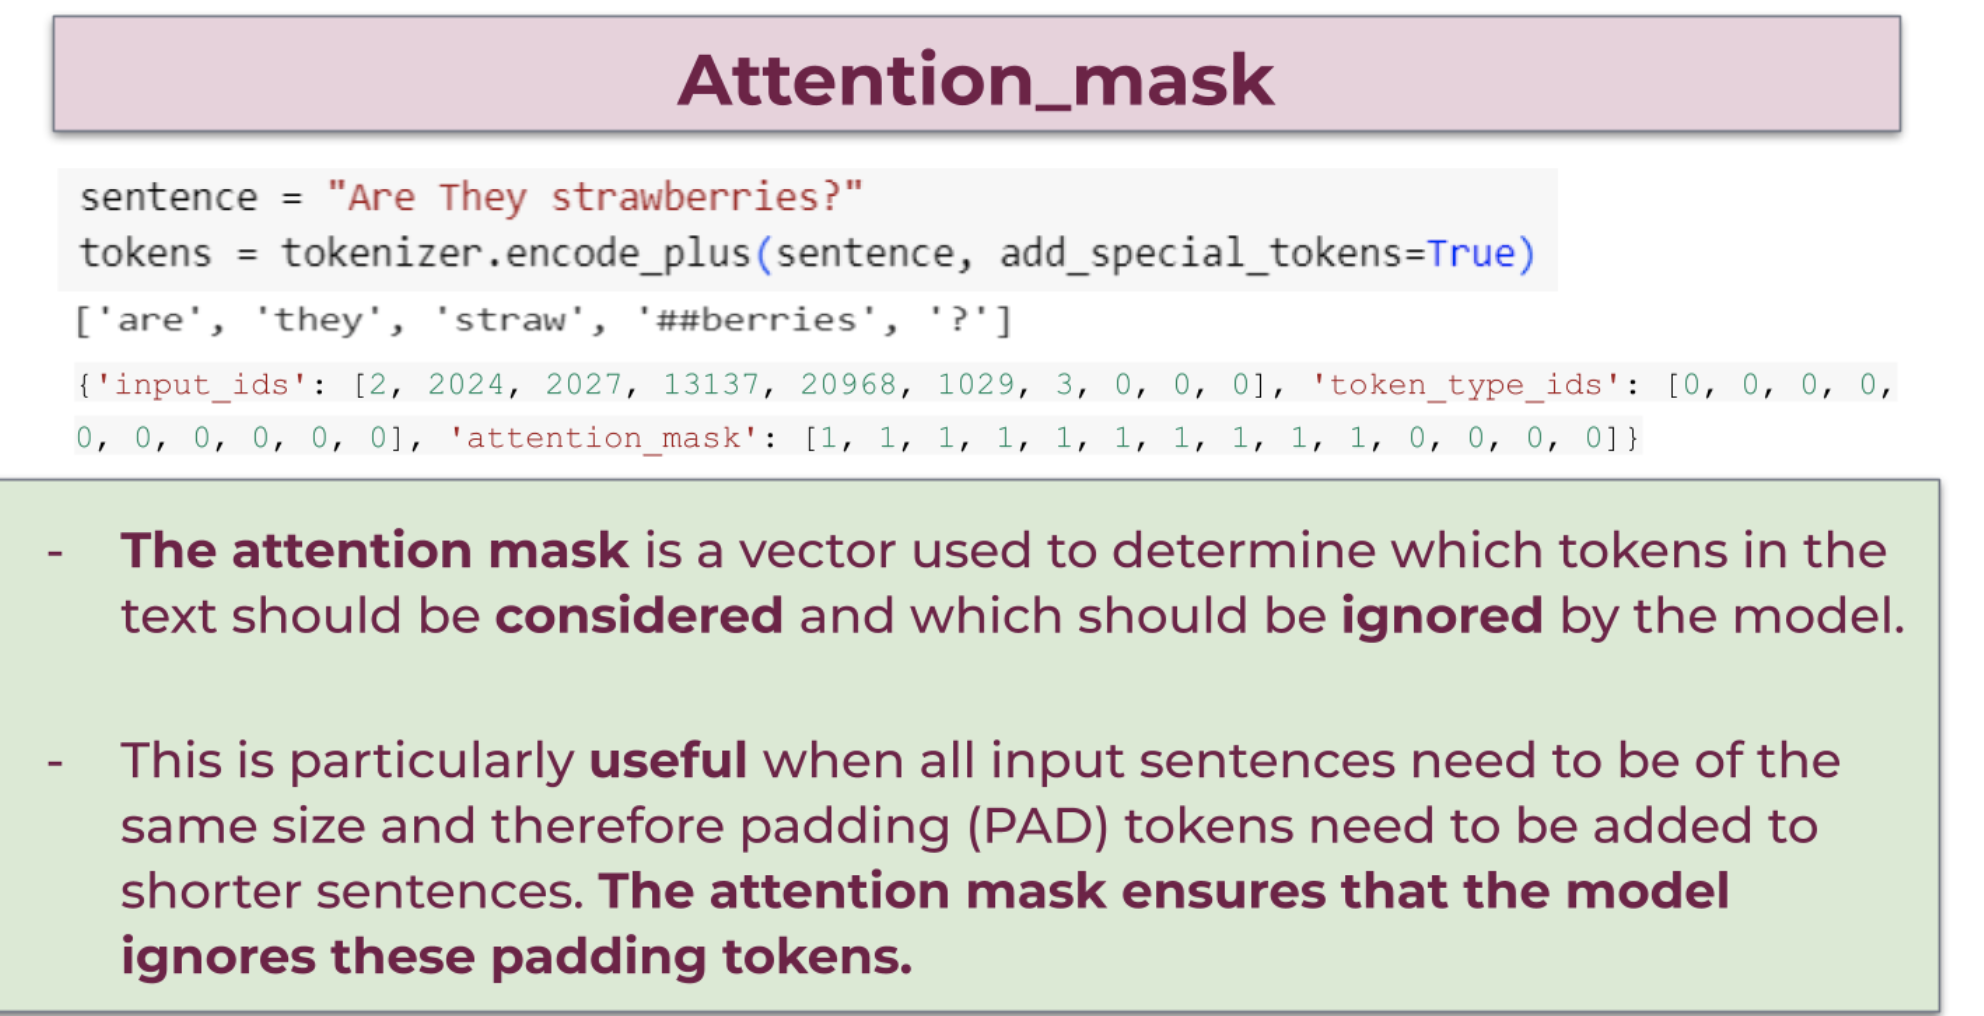